In [45]:
from langgraph.graph import StateGraph , START,END
from typing import TypedDict , Literal

In [46]:
class Quadstate(TypedDict):
    a : int 
    b : int 
    c : int 
    equation : str
    discrim : float
    result : str

In [47]:
def show(state : Quadstate):
    equation = f'({state['a']})x2 + ({state['b']})x + ({state['c']})'
    return {'equation' : equation}

def calc(state : Quadstate):
    discrim = state['b']**2 - 4*state['a']*state['c']
    return {'discrim' : discrim}

def real(state : Quadstate):
    root1 = (-1*state['b'] - state['discrim']**0.5)/2*state['a']
    root2 = (-1*state['b'] + state['discrim']**0.5)/2*state['a']

    result = f'Real roots are {root1} and {root2}'
    return {'result':result}

def repeat(state : Quadstate):
    root = (-1*state['b'])/(2*state['a'])
    

    result = f'Real roots are {root} and {root}'
    return {'result':result}

def non_real(state : Quadstate):
    result = f'No real roots exist'
    return {'result' : result}

def conditionall(state : Quadstate) -> Literal['realroots', 'repeatedroots', 'nonrealroots']:
    if state['discrim'] > 0:
        return 'realroots'
    elif state['discrim'] == 0:
        return 'repeatedroots'
    else : 
        return 'nonrealroots'


In [48]:
graph = StateGraph(Quadstate)

#adding nodes
graph.add_node('show_equation',show)
graph.add_node('calc_discriminant',calc)
graph.add_node('realroots' , real)
graph.add_node('nonrealroots' , non_real)
graph.add_node('repeatedroots',repeat)

#connect edges
graph.add_edge(START,'show_equation')
graph.add_edge('show_equation' , 'calc_discriminant')
graph.add_conditional_edges('calc_discriminant',conditionall)
graph.add_edge('realroots',END)
graph.add_edge('nonrealroots',END)
graph.add_edge('repeatedroots',END)
workflow = graph.compile()




In [49]:
workflow = graph.compile()

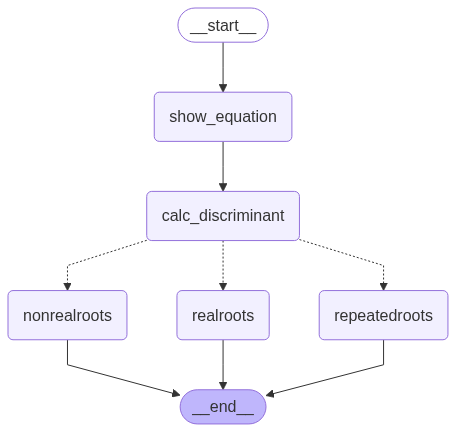

In [50]:
workflow

In [52]:
initial_state = { 'a':4,'b' : 32, 'c' : 4}
workflow.invoke(initial_state)


{'a': 4,
 'b': 32,
 'c': 4,
 'equation': '(4)x2 + (32)x + (4)',
 'discrim': 960,
 'result': 'Real roots are -125.96773353931867 and -2.0322664606813277'}